In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import babypandas as bpd

In [ ]:
# some data for today's class
data = bpd.read_csv('data/census.csv').get(['SEX', 'AGE', 'POPESTIMATE2015'])
cleaned_data = data[data.get('AGE') != 999]
males = cleaned_data[cleaned_data.get('SEX') == 1].drop(columns='SEX').set_index('AGE')
females = cleaned_data[cleaned_data.get('SEX') == 2].drop(columns='SEX').set_index('AGE')

population = bpd.DataFrame().assign(
    Males=males.get('POPESTIMATE2015'),
    Females=females.get('POPESTIMATE2015')
)

# Lecture 9

## Functions and Apply

# Functions

## Defining functions
* We've learned a lot of table operations.
* So far, we've been restricted to using existing functions.
    - What if we need to clean a column with specialized logic? 
    - What if we want to understand the distribution of a custom measurement, derived from existing columns?

In [ ]:
def spread(values):
    return max(values) - min(values)

In [ ]:
spread([20, 42, 99, 121])

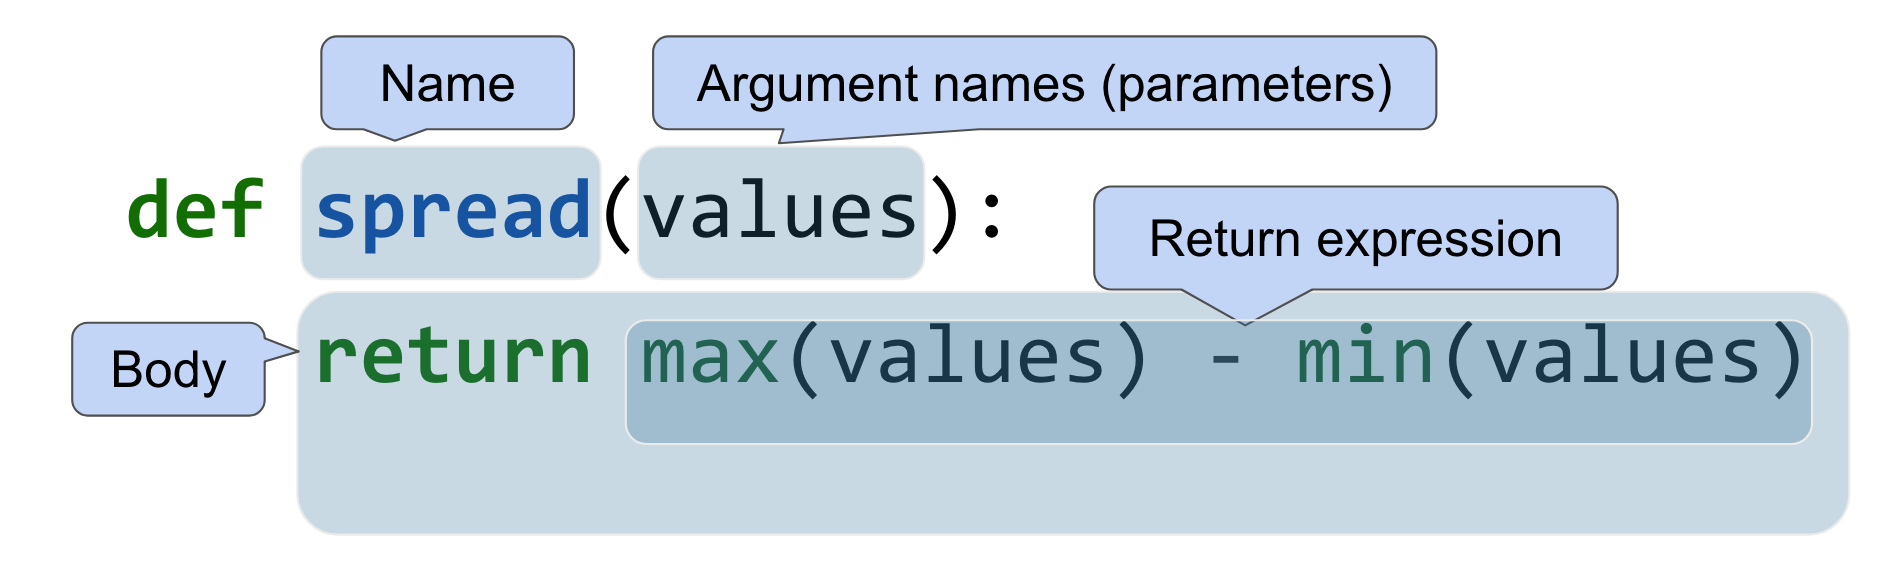

### `def` statements define functions
* User-defined functions give names to blocks of code.
* Functions are recipes; they are not run until you use (call) them.
* Variables defined in functions only exist inside the function.
* Inputs can be of any type.

In [ ]:
def what_is_awesome(s):
    '''returns what's awesome'''
    return s + ' is awesome!'

In [ ]:
# call the function:
what_is_awesome('data science')

In [ ]:
s

## Functions are lazy

- Errors aren't raised until the function is executed.

In [ ]:
def where_is_the_error(s):
    '''illustrates errors don't occur until functions are executed (called)'''
    return 4.0 + s + ' is awesome!'

In [ ]:
where_is_the_error(3.7)

## Multiple Arguments

- Your functions can have as many arguments as you want:

In [ ]:
def greeting(your_name, my_name):
    print('Hello', your_name,'my name is', my_name)

In [ ]:
greeting('Kanga', 'Roo')

In [ ]:
greeting('Zelda', 'Link')

### Example: first name

- Create a function that return's someone's first name.
- Hint: string method `.split()`

In [ ]:
#- name your function `first_name`


In [ ]:
first_name('Barack Obama')

# Applying Functions to Tables

## Example: Common First Names

- What is the most common first name among NBA players?
- We need to extract their first names.

In [ ]:
nba = bpd.read_csv('data/nba_salaries.csv')
nba

## Using our `first_name` function

- We can use our `first_name` function here.
- Need to call it for every player.

In [ ]:
nba.get('PLAYER').iloc[0]

In [ ]:
first_name(nba.get('PLAYER').iloc[0])

## `.apply()`

- To apply a function to every element of a column:
```
table.get(column_name).apply(function_name)
```
- Returns new Series
- Pass the function, don't call it!
    - good: `.apply(first_name)`
    - bad: `.apply(first_name())`

In [ ]:
nba.get('PLAYER').apply(first_name)

## Common names

In [ ]:
with_first_names = nba.assign(
    FIRSTNAME=nba.get('PLAYER').apply(first_name)
)
with_first_names

## Groupby

In [ ]:
#- count the first names


## Example: data cleaning
* Replace all three-digit ages with 100

In [ ]:
mini_census = bpd.DataFrame().assign(
    Name=['Ahmad', 'Bo', 'Charlie', 'David', 'Emily', 'Feng', 'Greta', 'Hao'], 
    Age=[27, 68, 106, 51, 102, 27, 115, 2]
).set_index('Name')
mini_census

### Use `apply` to clean data
* Create a function that returns the smallest of `Age` and 100.
* Apply it to all people in census
* Create a new column with cleaned data

In [ ]:
def cut_off_at_100(age):
    '''The smaller of x and 100'''
    return min(age, 100)

In [ ]:
mini_census.get('Age').apply(cut_off_at_100)

In [ ]:
mini_census.assign(
    CleanedAge=mini_census.get('Age').apply(cut_off_at_100)
)

### Discussion Question

If the name of the table is `top_movies` and the name of a column is "Title", how do we find the length of each movie title?

Option|Answer
---|---
A|`top_movies.get('Title').apply(len(s))`
B|`top_movies.get('Title').apply(len)`
C|`top_movies.apply(len, 'Title')`
D|`top_movies.apply('Title', len)`

In [ ]:
# BEGIN SOLUTION
top_movies = bpd.read_csv('data/top_movies.csv')
top_movies.get('Title').apply(len)
# END SOLUTION

## Aside: resetting the index

- What if we had set the movie title as the index?

In [ ]:
by_title = top_movies.set_index('Title')
by_title

In [ ]:
by_title.index.apply(len)

## Aside: resetting the index

- Only Series (columns) have the `.apply` method.
- But we can make the index a column with `.reset_index`:

In [ ]:
by_title

In [ ]:
by_title.reset_index().get('Title').apply(len)

# Example: Prediction

### Sir Francis Galton

<img src="data/galton_mittens.jpg" width=300>

* 1822 - 1911 (knighted in 1909)
* A pioneer in making predictions
* Particular interest in heredity
* Charles Darwin's half-cousin

### Can we predict the height of a child, given the height of their parents?
* read in heights from `galton.csv`
* relabel columns for convenience

In [ ]:
galton = bpd.read_csv('data/galton.csv')
galton = (
    galton.assign(
        midparent=galton.get('midparentHeight'),
        child=galton.get('childHeight')
    )
    .drop(columns=['midparentHeight', 'childHeight'])
)
galton

### Recall: Plotting multiple graphs at once
* Drop all extraneous columns from your table.
* Specify the column for the x-axis (if not the index) in `.plot(x=column_name)`
* `plot` will plot **all** other columns on a shared y-axis.

Same thing works for `barh`, `bar`, `hist`, but not `scatter`.

### Plotting overlayed histograms


- Use `.get([column_1, ..., column_k])` to get a DataFrame with only the columns you want.
- Try `alpha=.65` to get see-through bars.

### Scatterplot of child vs. mother/father
* Children's height influenced by a combination of the height of the mother and father
- Don't worry about plotting code.

In [ ]:
ax = galton.plot(kind='scatter', x='child', y='mother')
ax = galton.plot(kind='scatter', x='child', y='father', ax=ax, color='C2')
plt.ylabel('Parent Height')
plt.legend(['Mother', 'Father'])

### Scatterplot of midparent vs. child height
* Galton calculated the variable `midparent` that is a weighted average of the parents' height

In [ ]:
galton.plot(kind='scatter', x='midparent', y='child')

### Can we predict the height of a child, given the midparent height?

### Can we predict the height of a child, given the midparent height?

* Given the midparent height, restrict to nearby examples in the dataset (within 0.5 in).
* Take the average child height within these nearby examples.
* This average is our guess!

In [ ]:
galton.plot(kind='scatter', x='midparent', y='child')
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

### Can we predict the height of a child, given the midparent height?

In [ ]:
def predict_child(mp):
    '''returns a childs predicted height, given the midparent height, mp.'''

predict_child(68)

### Can we predict the height of a child, given the midparent height?
* Apply our function to all our examples
* Create a new column called `prediction` and plot the output 

In [ ]:
predictions = galton.get('midparent').apply(predict_child)
predictions

In [ ]:
with_predictions = galton.assign(prediction=predictions)
with_predictions

In [ ]:
ax = with_predictions.plot(kind='scatter', x='midparent', y='child')
with_predictions.plot(kind='scatter', x='midparent', y='prediction', ax=ax, color='C2')